# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 581


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [14]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lihue
Processing Record 2 of Set 1 | adamstown
Processing Record 3 of Set 1 | bethel
Processing Record 4 of Set 1 | alotau
City not found. Skipping...
Processing Record 5 of Set 1 | talnakh
Processing Record 6 of Set 1 | port mathurin
Processing Record 7 of Set 1 | kourou
Processing Record 8 of Set 1 | gizo
Processing Record 9 of Set 1 | inirida
Processing Record 10 of Set 1 | conceicao da barra
Processing Record 11 of Set 1 | waitangi
Processing Record 12 of Set 1 | margaret river
Processing Record 13 of Set 1 | tiksi
Processing Record 14 of Set 1 | sos'va
Processing Record 15 of Set 1 | namibe
Processing Record 16 of Set 1 | vorgashor
Processing Record 17 of Set 1 | port elizabeth
Processing Record 18 of Set 1 | tura
Processing Record 19 of Set 1 | kodiak
Processing Record 20 of Set 1 | yellowknife
Processing Record 21 of Set 1 | puerto natales
Processing Record 22 of Set 1 | west island
Proces

In [17]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
    
# Show Record Count
city_data_df.count()

City          542
Lat           542
Lng           542
Max Temp      542
Humidity      542
Cloudiness    542
Wind Speed    542
Country       542
Date          542
dtype: int64

In [18]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,lihue,21.9789,-159.3672,22.08,89,100,5.66,US,1706301761
1,adamstown,-25.0660,-130.1015,24.48,73,100,3.83,PN,1706301761
2,bethel,41.3712,-73.4140,6.20,86,100,2.06,US,1706301761
3,talnakh,69.4865,88.3972,-13.77,93,100,7.27,RU,1706301762
4,port mathurin,-19.6833,63.4167,27.55,84,100,5.52,MU,1706301762


In [19]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [20]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,lihue,21.9789,-159.3672,22.08,89,100,5.66,US,1706301761
1,adamstown,-25.0660,-130.1015,24.48,73,100,3.83,PN,1706301761
2,bethel,41.3712,-73.4140,6.20,86,100,2.06,US,1706301761
3,talnakh,69.4865,88.3972,-13.77,93,100,7.27,RU,1706301762
4,port mathurin,-19.6833,63.4167,27.55,84,100,5.52,MU,1706301762


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

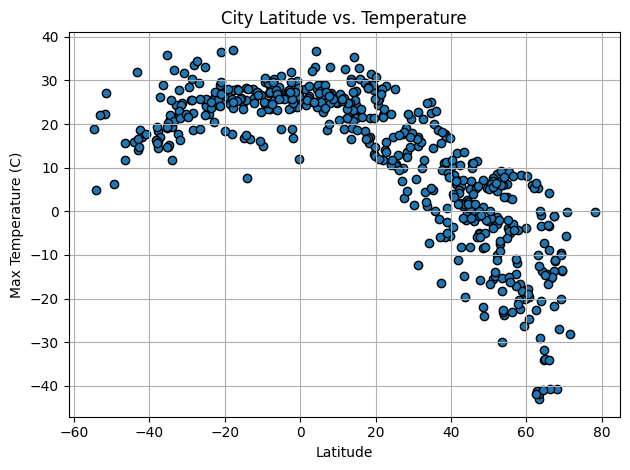

In [28]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'], marker='o',edgecolors='black')

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title(f"City Latitude vs. Temperature")
plt.tight_layout()

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

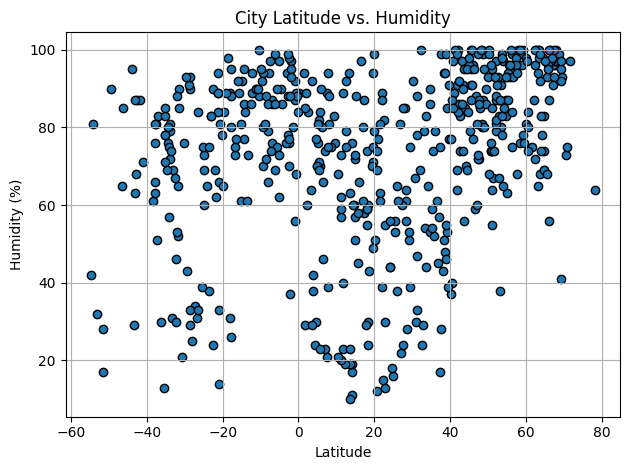

In [29]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'], marker='o',edgecolors='black')

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs. Humidity")
plt.tight_layout()

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

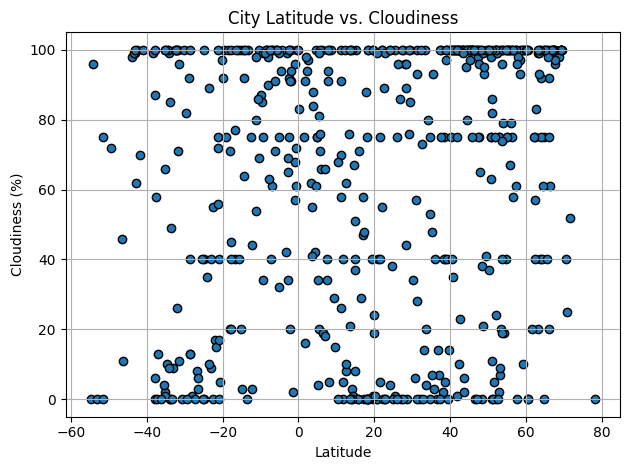

In [30]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'], marker='o',edgecolors='black')

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs. Cloudiness")
plt.tight_layout()

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

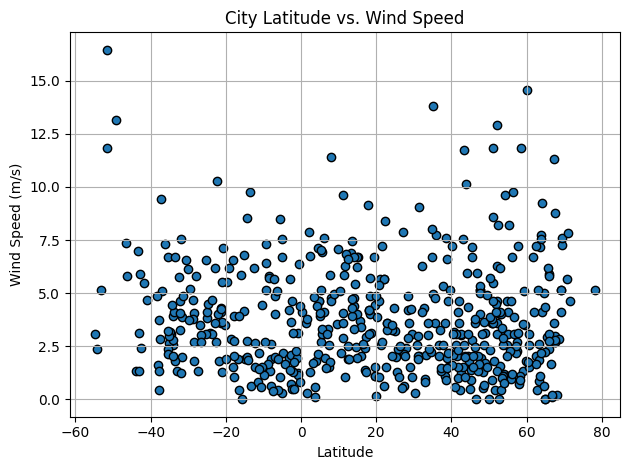

In [31]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'], marker='o',edgecolors='black')

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title(f"City Latitude vs. Wind Speed")
plt.tight_layout()

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [32]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat']>= 0,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,lihue,21.9789,-159.3672,22.08,89,100,5.66,US,1706301761
2,bethel,41.3712,-73.4140,6.20,86,100,2.06,US,1706301761
3,talnakh,69.4865,88.3972,-13.77,93,100,7.27,RU,1706301762
5,kourou,5.1552,-52.6478,29.03,76,34,3.92,GF,1706301762
7,inirida,3.8653,-67.9239,33.01,42,88,1.79,CO,1706301762


In [33]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat']<= 0,:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,adamstown,-25.0660,-130.1015,24.48,73,100,3.83,PN,1706301761
4,port mathurin,-19.6833,63.4167,27.55,84,100,5.52,MU,1706301762
6,gizo,-8.1030,156.8419,28.68,66,100,1.88,SB,1706301762
8,conceicao da barra,-18.5933,-39.7322,24.54,98,100,2.85,BR,1706301762
9,waitangi,-43.9535,-176.5597,16.01,95,98,1.34,NZ,1706301763


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7075841385728395


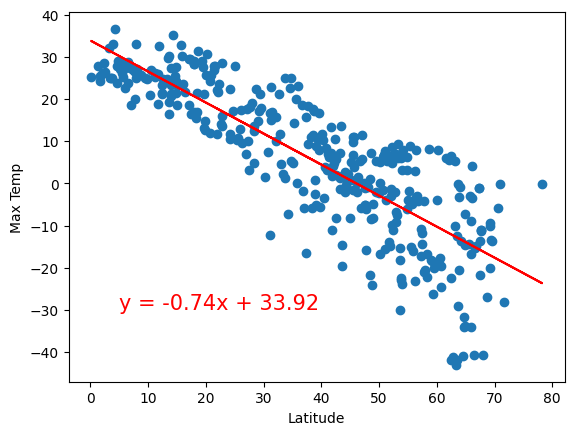

In [40]:
# Linear regression on Northern Hemisphere
x = (northern_hemi_df['Lat'])
y = (northern_hemi_df['Max Temp'])
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x , y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(5,-30),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(f"The r-value is: {rvalue**2}")
plt.show()

The r-value is: 0.17537626274699233


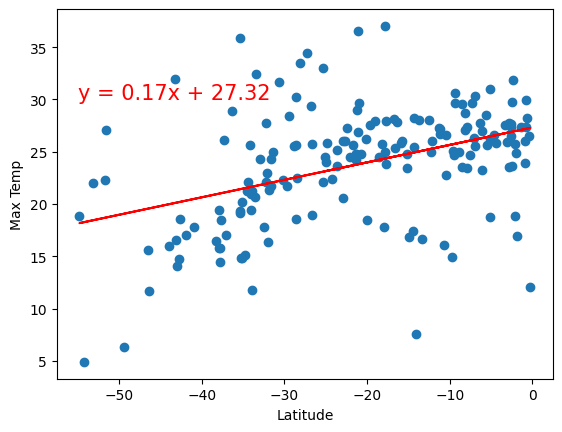

In [41]:
# Linear regression on Southern Hemisphere
x = (southern_hemi_df['Lat'])
y = (southern_hemi_df['Max Temp'])
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x , y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(-55,30),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(f"The r-value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship: We can observe on the first graphic (Latitude vs Max Temp) how steadily the temperature decrease as the latitude increases compared to the second graphic which doesn’t show steady temperature changes compared to the latitude. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.24146685391912492


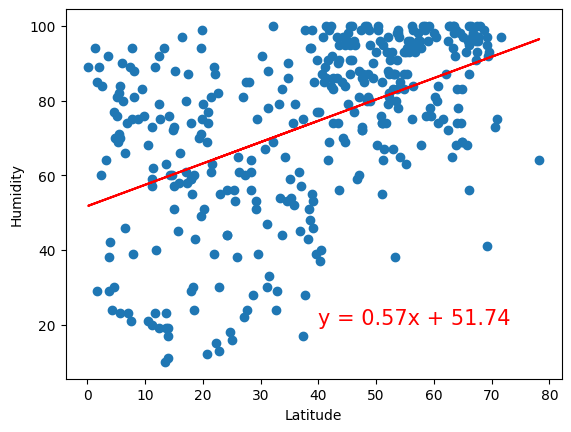

In [43]:
# Northern Hemisphere
x = (northern_hemi_df['Lat'])
y = (northern_hemi_df['Humidity'])
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x , y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(40,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"The r-value is: {rvalue**2}")
plt.show()

The r-value is: 0.14679585960883387


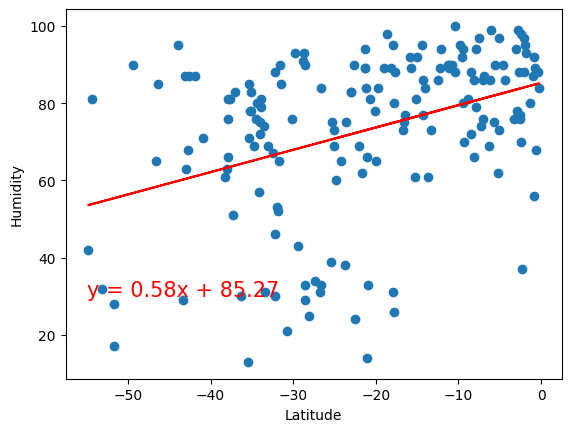

In [44]:
# Southern Hemisphere
x = (southern_hemi_df['Lat'])
y = (southern_hemi_df['Humidity'])
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x , y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(-55,30),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"The r-value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship: On the first graphic (North), he can see how there is not a consistent change in humidity but it is clear how when the latitude is above 40 and below 8- the humidity level is 50 or above in comparison to the south graphic, the results show most humidity  (around 60 and above) in most of the graphic but mainly on latitude from 0 to -20.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.06118615901718791


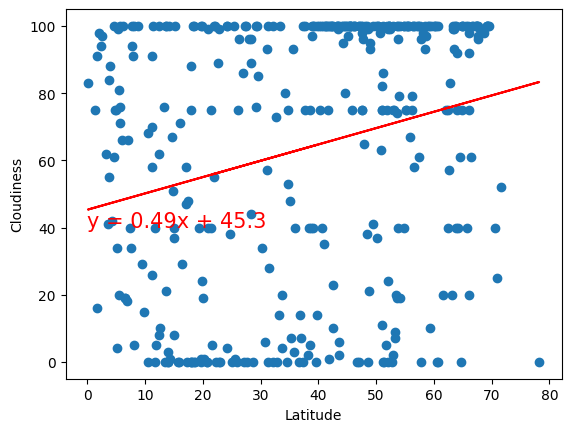

In [45]:
# Northern Hemisphere
x = (northern_hemi_df['Lat'])
y = (northern_hemi_df['Cloudiness'])
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x , y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(0,40),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f"The r-value is: {rvalue**2}")
plt.show()

The r-value is: 0.07384963355287895


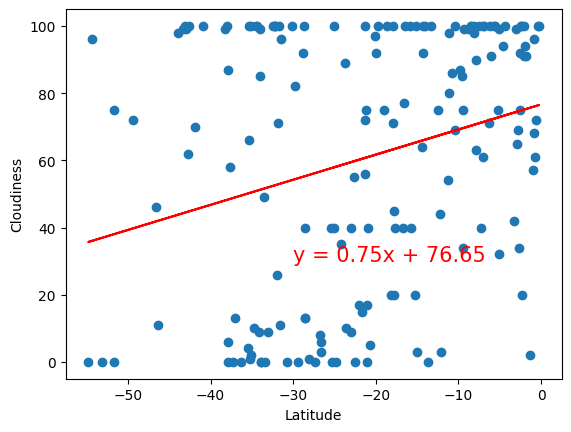

In [46]:
# Southern Hemisphere
x = (southern_hemi_df['Lat'])
y = (southern_hemi_df['Cloudiness'])
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x , y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(-30,30),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f"The r-value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship: In this case, both graphics are very similar, there is not too much consistency on the cloudiness based on the latitude but 0 and 100 are the most dominant. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.0008603699242566621


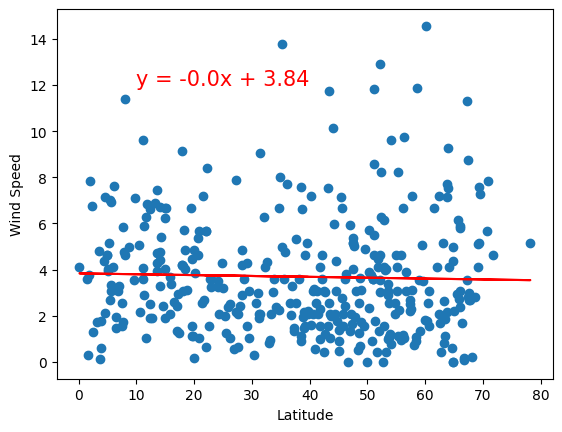

In [47]:
# Northern Hemisphere
x = (northern_hemi_df['Lat'])
y = (northern_hemi_df['Wind Speed'])
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x , y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(10,12),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f"The r-value is: {rvalue**2}")
plt.show()

The r-value is: 0.09472098766072351


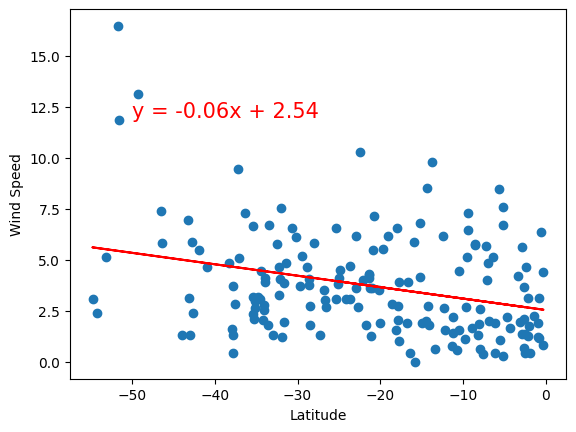

In [48]:
# Southern Hemisphere
x = (southern_hemi_df['Lat'])
y = (southern_hemi_df['Wind Speed'])
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x , y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(-50,12),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f"The r-value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship: We can see in this two graphics how the wind speed vary in between cities but in most cities it is around 8 or below, there is of course some exceptions but mainly there are all in the low numbers. 